In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_validate, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 




# LOAD DATA SET


In [195]:
df= pd.read_csv(r"C:\Users\Adib Fardan\Downloads\data_travel_insurance.csv")
df.head()


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [196]:
df.shape

(44328, 11)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


# DATA CLEANING 
### First, we need to check the data, is there any duplicate, null/nan values or unique wording, if it so,  We need to clean this data first.

In [198]:
df.describe(include='all')

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
count,44328,44328,44328,44328,12681,44328.000000,44328,44328.000000,44328.000000,44328.000000,44328
unique,16,2,2,26,2,NaN,138,NaN,NaN,NaN,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,NaN,SINGAPORE,NaN,NaN,NaN,No
freq,24656,32113,43572,12979,6504,NaN,9267,NaN,NaN,NaN,43651
mean,NaN,NaN,NaN,NaN,NaN,49.424292,NaN,40.550948,9.707692,39.925600,NaN
std,NaN,NaN,NaN,NaN,NaN,109.153961,NaN,48.661970,19.625637,13.954926,NaN
min,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,-357.500000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,18.000000,0.000000,35.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,26.500000,0.000000,36.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,53.000000,NaN,48.000000,11.550000,43.000000,NaN


Agency, Product Name and Destination have many unique values, so we will use binary endcoding
Agency Type, Distribution Channel, Gender have 2 unique values, so we will use one hot endcoding

We will apply scaller to numeric feature, such as Duration, Net Sales, Commision and Age

In [199]:
df.rename(columns={'Commision (in value)':'Commision' }, inplace=True)
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


### Find the duplicate

In [200]:
df.drop_duplicates()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [201]:
df.duplicated().sum()

4667

### Cleaning the duplicate

In [202]:
df.drop_duplicates(inplace=True)

In [203]:
df.duplicated().sum()

0

### Find NaN/Null

In [204]:
df.isna()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision,Age,Claim
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
44323,False,False,False,False,True,False,False,False,False,False,False
44324,False,False,False,False,True,False,False,False,False,False,False
44325,False,False,False,False,False,False,False,False,False,False,False
44326,False,False,False,False,True,False,False,False,False,False,False


In [205]:
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  27667
Duration                    0
Destination                 0
Net Sales                   0
Commision                   0
Age                         0
Claim                       0
dtype: int64

### Cleaning NaN/Null

In [206]:
df.drop('Gender', axis=1, inplace=True) 

In [207]:
df.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision               0
Age                     0
Claim                   0
dtype: int64

In [208]:
df.shape

(39661, 10)

# EDA


In [269]:
for i in df.select_dtypes('O'):
     print(f'{i} punya : {df[i].nunique()} unique values')

Agency punya : 16 unique values
Agency Type punya : 2 unique values
Distribution Channel punya : 2 unique values
Product Name punya : 26 unique values
Destination punya : 138 unique values
Claim punya : 2 unique values


In [270]:
df['Agency Type'].nunique()
df.value_counts()

Agency  Agency Type    Distribution Channel  Product Name                          Duration  Destination        Net Sales  Commision  Age  Claim
JWT     Airlines       Online                Value Plan                            20        INDIA              31.0       12.40      118  No       3
                                                                                   9         INDIA              31.0       12.40      118  No       3
CCR     Travel Agency  Offline               Comprehensive Plan                    4         MALAYSIA           29.0       9.57       118  No       3
RAB     Airlines       Online                Value Plan                            6         BRUNEI DARUSSALAM  15.0       6.00       30   No       3
JWT     Airlines       Online                Value Plan                            19        INDIA              39.0       15.60      118  No       2
                                                                                                         

In [271]:
df['Product Name'].value_counts()

Product Name
Cancellation Plan                       11009
2 way Comprehensive Plan                 8133
Rental Vehicle Excess Insurance          5726
Basic Plan                               3692
Bronze Plan                              2718
1 way Comprehensive Plan                 1848
Value Plan                               1647
Silver Plan                              1504
Annual Silver Plan                        897
Ticket Protector                          711
Travel Cruise Protect                     342
Comprehensive Plan                        245
Gold Plan                                 236
24 Protect                                171
Annual Gold Plan                          138
Single Trip Travel Protect Gold           134
Premier Plan                              124
Single Trip Travel Protect Silver         116
Annual Travel Protect Gold                 63
Annual Travel Protect Silver               59
Single Trip Travel Protect Platinum        47
Individual Comprehens

In [272]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


Agency Type    Claim
Airlines       No       11087
               Yes        437
Travel Agency  No       27899
               Yes        238
Name: count, dtype: int64

<Axes: xlabel='Agency Type', ylabel='count'>

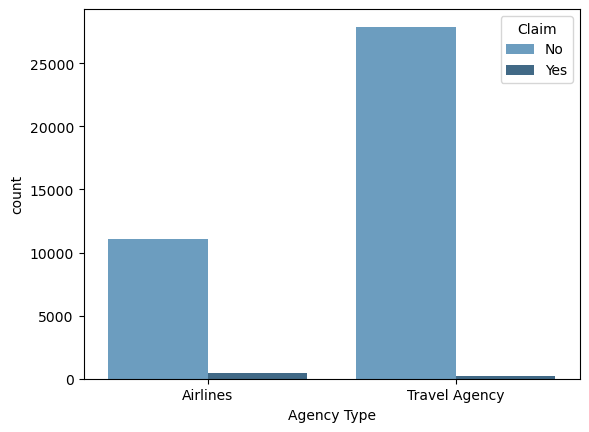

In [268]:
agency_type_claims = df.groupby('Agency Type')['Claim'].value_counts()
display(agency_type_claims)
sns.countplot(data=df, x='Agency Type', hue='Claim', palette='Blues_d')

# DATA PREP

In [209]:
from sklearn.model_selection import train_test_split 

# preprocessing 
from sklearn.preprocessing import OneHotEncoder 
from category_encoders import OrdinalEncoder, BinaryEncoder  
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 
from sklearn.compose import ColumnTransformer 

# modeling 
from sklearn.tree import DecisionTreeRegressor 

# metric 
from sklearn.metrics import mean_squared_error 

# SPLITTING DATA

In [210]:
X = df.drop(columns='Claim')
y = df['Claim'].map({'Yes': 1, 'No': 0})

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [212]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X,
#     y,
#     test_size=0.2,
#     random_state=10
# )

In [213]:
y_train.name

'Claim'

In [214]:
# Separate classes
df_class_0 = X_train[y_train == 0]
df_class_1 = X_train[y_train == 1]

# Randomly sample 3000 rows from class 0
df_class_0_sampled = df_class_0.sample(n=3000, random_state=42)

# Combine with all class 1 samples
X_train_balanced = pd.concat([df_class_0_sampled, df_class_1]).reset_index(drop=True)
y_train_balanced = pd.concat([
    pd.Series([0] * 3000),
    pd.Series([1] * len(df_class_1))
]).reset_index(drop=True)

# Shuffle the combined dataset
combined = pd.concat([X_train_balanced, y_train_balanced], axis=1)
combined = combined.sample(frac=1, random_state=42)
combined = combined.rename(columns={combined.columns[-1]: 'Claim'})

print(combined)

X_train_balanced = combined.drop(y_train.name, axis=1)
y_train_balanced = combined[y_train.name]

print("New class distribution:", np.bincount(y_train_balanced))

     Agency    Agency Type Distribution Channel  \
712     EPX  Travel Agency               Online   
279     JZI       Airlines               Online   
1456    LWC  Travel Agency               Online   
3504    C2B       Airlines               Online   
2194    CWT  Travel Agency               Online   
...     ...            ...                  ...   
1130    EPX  Travel Agency               Online   
1294    EPX  Travel Agency              Offline   
860     EPX  Travel Agency               Online   
3507    C2B       Airlines               Online   
3174    C2B       Airlines               Online   

                         Product Name  Duration    Destination  Net Sales  \
712                 Cancellation Plan       151          CHINA       32.0   
279                        Basic Plan        23      HONG KONG       26.0   
1456       Annual Travel Protect Gold       369  UNITED STATES      256.2   
3504                      Silver Plan        77      SINGAPORE       63.5   
21

In [215]:
unique_values_summary = {
    'Column': [],
    'Total Unique Values': [],
    'Unique Values': []
}
pd.set_option('display.max_colwidth', None)

for column in df.columns:
    unique_vals = df[column].unique()
    unique_values_summary['Column'].append(column)
    unique_values_summary['Unique Values'].append(unique_vals)
    unique_values_summary['Total Unique Values'].append(len(unique_vals))

display(pd.DataFrame(unique_values_summary))

pd.reset_option('display.max_colwidth')

,Column,Total Unique Values,Unique Values
0,Agency,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,2,"[Airlines, Travel Agency]"
2,Distribution Channel,2,"[Online, Offline]"
3,Product Name,26,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
4,Duration,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
5,Destination,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
6,Net Sales,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
7,Commision,915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 3.23, 15.93, ...]"
8,Age,89,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 51, 65, 47, 35, 54, 23, 46, 58, 42, 31, 29, 37, 68, 8, 32, 61, 49, 56, 25, 50, 34, 38, 44, 118, 45, 53, 20, 30, 41, 69, 52, 40, 70, 76, 74, 66, 63, 55, 21, 60, 75, 24, 62, 7

In [216]:
df['Claim'].value_counts()


Claim
No     38986
Yes      675
Name: count, dtype: int64

# FEATURE ENGINEERING


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39661 entries, 0 to 44327
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                39661 non-null  object 
 1   Agency Type           39661 non-null  object 
 2   Distribution Channel  39661 non-null  object 
 3   Product Name          39661 non-null  object 
 4   Duration              39661 non-null  int64  
 5   Destination           39661 non-null  object 
 6   Net Sales             39661 non-null  float64
 7   Commision             39661 non-null  float64
 8   Age                   39661 non-null  int64  
 9   Claim                 39661 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 3.3+ MB


In [218]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['Agency Type', 'Distribution Channel',]), 
    ('binary', BinaryEncoder(), ['Agency','Product Name', 'Destination']),
    ('robust', RobustScaler(), ['Net Sales', 'Duration','Commision','Age'])
], remainder='passthrough') 

In [219]:
transformer.fit(X_train_balanced)

# transform to X_train & X_test
X_train_prep = transformer.transform(X_train_balanced)
X_test_prep = transformer.transform(X_test)

In [220]:
X_train_prep_df = pd.DataFrame(X_train_prep)
X_train_prep_df.head() 

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.061224,2.50,-0.211299,0.000000
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.091837,-0.06,0.456346,2.166667
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,5.780612,6.86,12.006603,0.416667
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.864796,1.02,0.953778,0.583333
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.517857,-0.26,3.710932,-1.166667


In [221]:
col_onehot = list(transformer.transformers_[0][1].get_feature_names_out())
col_onehot

['Agency Type_Airlines',
 'Agency Type_Travel Agency',
 'Distribution Channel_Offline',
 'Distribution Channel_Online']

In [222]:
col_binary = list(transformer.transformers_[1][1].get_feature_names_out())
col_binary

['Agency_0',
 'Agency_1',
 'Agency_2',
 'Agency_3',
 'Agency_4',
 'Product Name_0',
 'Product Name_1',
 'Product Name_2',
 'Product Name_3',
 'Product Name_4',
 'Destination_0',
 'Destination_1',
 'Destination_2',
 'Destination_3',
 'Destination_4',
 'Destination_5',
 'Destination_6']

In [223]:
col_robust = list(transformer.transformers_[2][2])
col_robust

['Net Sales', 'Duration', 'Commision', 'Age']

In [224]:
all_features = col_onehot + col_binary + col_robust
all_features 

['Agency Type_Airlines',
 'Agency Type_Travel Agency',
 'Distribution Channel_Offline',
 'Distribution Channel_Online',
 'Agency_0',
 'Agency_1',
 'Agency_2',
 'Agency_3',
 'Agency_4',
 'Product Name_0',
 'Product Name_1',
 'Product Name_2',
 'Product Name_3',
 'Product Name_4',
 'Destination_0',
 'Destination_1',
 'Destination_2',
 'Destination_3',
 'Destination_4',
 'Destination_5',
 'Destination_6',
 'Net Sales',
 'Duration',
 'Commision',
 'Age']

In [225]:
print(len(X_train_prep_df.columns))
print(len(all_features)) 

25
25


In [226]:
# X_train
X_train_prep_df.columns = all_features
X_train_prep_df.head() 

,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Agency_0,Agency_1,Agency_2,Agency_3,Agency_4,Product Name_0,...,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Destination_6,Net Sales,Duration,Commision,Age
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.061224,2.50,-0.211299,0.000000
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.091837,-0.06,0.456346,2.166667
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,5.780612,6.86,12.006603,0.416667
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.864796,1.02,0.953778,0.583333
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.517857,-0.26,3.710932,-1.166667


In [227]:
X_test_prep_df = pd.DataFrame(data=X_test_prep, columns=all_features)
X_test_prep_df.head()

,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Agency_0,Agency_1,Agency_2,Agency_3,Agency_4,Product Name_0,...,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Destination_6,Net Sales,Duration,Commision,Age
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,-0.193878,-0.38,0.353632,0.916667
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.545918,-0.06,-0.211299,0.000000
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.002551,-0.32,1.096112,-0.750000
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.012755,0.86,2.839325,0.166667
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,-0.040816,-0.20,-0.211299,0.000000


In [228]:
display (X_train_prep_df)

,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Agency_0,Agency_1,Agency_2,Agency_3,Agency_4,Product Name_0,...,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Destination_6,Net Sales,Duration,Commision,Age
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.061224,2.50,-0.211299,0.000000
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.091837,-0.06,0.456346,2.166667
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,5.780612,6.86,12.006603,0.416667
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.864796,1.02,0.953778,0.583333
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.517857,-0.26,3.710932,-1.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.086735,0.28,-0.211299,0.000000
3536,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.438776,-0.36,-0.211299,0.000000
3537,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.244898,-0.48,-0.211299,-0.750000
3538,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.219388,-0.28,0.173881,-0.666667


In [229]:
from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)

In [230]:
display (y_train)

7222     0
36472    0
34186    0
24775    0
31270    0
        ..
36662    0
23607    1
14327    0
1637     0
7008     0
Name: Claim, Length: 31728, dtype: int64

In [231]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
# define model 
model = GradientBoostingClassifier()
model.fit(X_train_prep_df, y_train_balanced)

# y_pred = model.predict(X_test)
# predict
y_pred = model.predict(X_test_prep_df)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [232]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Preprocess 'y_test' 
y_test = y_test.replace({'Yes': 1, 'No': 0})  # Replace categorical labels with numbers

# Initialize and fit

In [233]:
print(y_test.shape)
print(y_pred.shape)

(7933,)
(7933,)


# MODEL & EVALUATION

In [234]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()
svc= SVC(probability=True)


# MODEL BENCHMARKING: K-FOLD

In [235]:

models = [logreg, knn, dt, rf, xgb, lgbm]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']

best_recall = []

skfold = StratifiedKFold(n_splits=5)

for model, name in zip(models, model_names):
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])

    model_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall')

    best_recall.append(model_cv.max())

    print(f"{name} - Recall Scores: {model_cv}, Best Recall: {model_cv.max():.4f}")

results_df = pd.DataFrame({
    'model': model_names,
    'best recall': best_recall
}).set_index('model').sort_values(by='best recall', ascending=False)

results_df


Logistic Regression - Recall Scores: [0. 0. 0. 0. 0.], Best Recall: 0.0000
KNN - Recall Scores: [nan nan nan nan nan], Best Recall: nan
Decision Tree - Recall Scores: [0.07407407 0.05555556 0.0462963  0.06481481 0.09259259], Best Recall: 0.0926
Random Forest - Recall Scores: [0.02777778 0.         0.00925926 0.01851852 0.00925926], Best Recall: 0.0278
XGBoost - Recall Scores: [0.         0.         0.         0.         0.00925926], Best Recall: 0.0093
[LightGBM] [Info] Number of positive: 432, number of negative: 24950
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 25382, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.017020 -> initscore=-4.056204
[LightGBM] [Info] Start training from scor

,best recall
model,
Decision Tree,0.092593
Random Forest,0.027778
XGBoost,0.009259
LightGBM,0.009259
Logistic Regression,0.000000
KNN,NaN


In [236]:
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = [logreg,dt,rf,svc,knn,xgb]

# A dictionary containing metrics used
metrics = {'balanced_accuracy': 'balanced_accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1'}

accuracy_arr = []
precision_arr = []
recall_arr = []
score_f1_arr = []

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_validate(estimator,X_train,y_train,cv=skfold,scoring=metrics)
    accuracy_arr.append(model_cv['test_balanced_accuracy'].mean())
    precision_arr.append(model_cv['test_precision'].mean())
    recall_arr.append(model_cv['test_recall'].mean())
    score_f1_arr.append(model_cv['test_f1'].mean())
    
pd.DataFrame({'models':['Logistic Regression', 'Decision Tree', 'Random Forest', 'svc', 'KNN', 'XGBoost'],
            'accuracy':accuracy_arr,
            'precision':precision_arr,
            'recall':recall_arr,
            'f1 score':score_f1_arr}).set_index('models').sort_values(by='recall',ascending=False)

,accuracy,precision,recall,f1 score
models,,,,
Decision Tree,0.522612,0.054410,0.064815,0.059087
Random Forest,0.505071,0.075278,0.012963,0.021995
XGBoost,0.500653,0.028571,0.001852,0.003478
Logistic Regression,0.499952,0.000000,0.000000,0.000000
svc,0.500000,0.000000,0.000000,0.000000
KNN,NaN,NaN,NaN,NaN


# MODEL BENCHMARKING TEST DATA

In [237]:
# models = [logreg,dt,rf,svc,knn,xgb]
models= [logreg,dt,rf,svc,xgb]

accuracy_arr = []
precision_arr = []
recall_arr = []
score_f1_arr = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('models',i)])
    X_train,X_test
    
    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_test),X_test)

for i,j in zip(models, ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'KNN', 'XGBoost']):
    estimator, y_pred, X_test = y_pred_func(i)
    accuracy_arr.append(accuracy_score(y_test, y_pred))
    precision_arr.append(precision_score(y_test, y_pred))
    recall_arr.append(recall_score(y_test, y_pred))
    score_f1_arr.append(f1_score(y_test, y_pred))

pd.DataFrame({'models':['Logistic Regeression', 'Decision Tree','Random Forest','svc','XGBoost'],
            'accuracy':accuracy_arr,
            'precision':precision_arr,
            'recall':recall_arr,
            'f1 score':score_f1_arr}).set_index('models').sort_values(by='recall',ascending=False)
    
# # pd.DataFrame({'models':['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'KNN', 'XGBoost'],
#             'accuracy':accuracy_arr,
#             'precision':precision_arr,
#             'recall':recall_arr,
#             'f1 score':score_f1_arr}).set_index('models').sort_values(by='recall',ascending=False)

,accuracy,precision,recall,f1 score
models,,,,
Decision Tree,0.961049,0.046875,0.066667,0.055046
Random Forest,0.978444,0.026316,0.007407,0.011561
XGBoost,0.982604,0.200000,0.007407,0.014286
Logistic Regeression,0.982982,0.000000,0.000000,0.000000
svc,0.982982,0.000000,0.000000,0.000000


In [238]:
print(len(X_test))
print(len(X_train))
print(len(y_test))
print(len(y_train))

7933
31728
7933
31728


# IMBALANCE

In [239]:
print(X_train.dtypes)

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Duration                  int64
Destination              object
Net Sales               float64
Commision               float64
Age                       int64
dtype: object


In [240]:
print(y_train.dtypes)

int64


In [241]:
gb_classifier = GradientBoostingClassifier(
    random_state=17,
    n_estimators=100,
    learning_rate=0.1,
    # Increase importance of minority class
    subsample=0.8,  # helps with imbalance
    max_features='sqrt'  # prevents overfitting
)
classifiers = [
    #('Logistic Regression', LogisticRegression(random_state=17)),
    ('Decision Tree', DecisionTreeClassifier(random_state=17)),
    ('Gradient Boosting',gb_classifier),
    ('XGBoost', XGBClassifier(eval_metric='logloss', random_state=17)),
    
]
n_majority = 2000 
sampling_strategy = {
    0: n_majority,
    1: 675  # keep all minority samples
}
resamplers = [
    ('None', None),
    ('RandomOverSampler', RandomOverSampler(random_state=17)),
    ('RandomOverSampler_0.3', RandomOverSampler(sampling_strategy= 0.3, random_state=17)),
    ('RandomOverSampler_0.5', RandomOverSampler(sampling_strategy= 0.5, random_state=17)),
    ('RandomUnderSampler', RandomUnderSampler(sampling_strategy= 0.1, random_state=17)),
    # ('SMOTE', SMOTE (sampling_strategy=0.3, random_state=17)), 
    # ('NearMiss', NearMiss()),
    # ('SMOTEENN', SMOTEENN(random_state=17))
]

cv_results = []
test_results = []

metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}
for resample_name, resample in resamplers:
    for clf_name, clf in classifiers:
        print(f"Processing {clf_name} with {resample_name} ...")

        steps = [('preprocessor', transformer)]
        if resample:
            steps.append(('resampler', resample))
        steps.append(('classifier', clf))

        pipeline = Pipeline(steps=steps)

        try:
            # Perform cross-validation for detailed metrics
            cv_scores = cross_validate(
                pipeline, X_train, y_train, cv=5, scoring=metrics, return_train_score=False
            )

            cv_results.append({
                'Model': clf_name,
                'Resampler': resample_name,
                'CV Accuracy': cv_scores['test_accuracy'].mean(),
                'CV Precision': cv_scores['test_precision'].mean(),
                'CV Recall': cv_scores['test_recall'].mean(),
                'CV F1 Score': cv_scores['test_f1'].mean()
            })

            pipeline.fit(X_train, y_train)

            y_pred = pipeline.predict(X_test)

            test_f1 = f1_score(y_test, y_pred)
            test_accuracy = accuracy_score(y_test, y_pred)
            test_precision = precision_score(y_test, y_pred)
            test_recall = recall_score(y_test, y_pred)

            test_results.append({
                'Model': clf_name,
                'Resampler': resample_name,
                'Test Accuracy': test_accuracy,
                'Test Precision': test_precision,
                'Test Recall': test_recall,
                'Test F1 Score': test_f1
            })

        except Exception as e:
            print(f"Error processing {clf_name} with {resample_name}: {e}")
cv_results_df = pd.DataFrame(cv_results).sort_values(by='CV Recall', ascending=False)
test_results_df = pd.DataFrame(test_results).sort_values(by='Test Recall', ascending=False)

print("Cross-Validation Results:")
print(cv_results_df)
print("\nTest Results:")
print(test_results_df)

Processing Decision Tree with None ...
Processing Gradient Boosting with None ...
Processing XGBoost with None ...
Processing Decision Tree with RandomOverSampler ...
Processing Gradient Boosting with RandomOverSampler ...
Processing XGBoost with RandomOverSampler ...
Processing Decision Tree with RandomOverSampler_0.3 ...
Processing Gradient Boosting with RandomOverSampler_0.3 ...
Processing XGBoost with RandomOverSampler_0.3 ...
Processing Decision Tree with RandomOverSampler_0.5 ...
Processing Gradient Boosting with RandomOverSampler_0.5 ...
Processing XGBoost with RandomOverSampler_0.5 ...
Processing Decision Tree with RandomUnderSampler ...
Processing Gradient Boosting with RandomUnderSampler ...
Processing XGBoost with RandomUnderSampler ...
Cross-Validation Results:
                Model              Resampler  CV Accuracy  CV Precision  \
4   Gradient Boosting      RandomOverSampler     0.803265      0.058568   
10  Gradient Boosting  RandomOverSampler_0.5     0.874307      0.0

In [242]:
pd.DataFrame(cv_results).sort_values('CV Recall', ascending=False)


,Model,Resampler,CV Accuracy,CV Precision,CV Recall,CV F1 Score
4,Gradient Boosting,RandomOverSampler,0.803265,0.058568,0.700000,0.108089
10,Gradient Boosting,RandomOverSampler_0.5,0.874307,0.077663,0.587037,0.137176
7,Gradient Boosting,RandomOverSampler_0.3,0.917991,0.091706,0.427778,0.150964
5,XGBoost,RandomOverSampler,0.927351,0.076623,0.296296,0.121717
12,Decision Tree,RandomUnderSampler,0.901191,0.047982,0.253704,0.080624
11,XGBoost,RandomOverSampler_0.5,0.944781,0.083723,0.224074,0.121802
8,XGBoost,RandomOverSampler_0.3,0.954961,0.086078,0.170370,0.114306
14,XGBoost,RandomUnderSampler,0.953511,0.081289,0.166667,0.109167
13,Gradient Boosting,RandomUnderSampler,0.975510,0.144997,0.077778,0.099297
9,Decision Tree,RandomOverSampler_0.5,0.966938,0.069677,0.075926,0.072602


In [243]:
pd.DataFrame(test_results).sort_values(by='Test Recall',ascending=False)

,Model,Resampler,Test Accuracy,Test Precision,Test Recall,Test F1 Score
4,Gradient Boosting,RandomOverSampler,0.800706,0.057528,0.696296,0.106275
10,Gradient Boosting,RandomOverSampler_0.5,0.874953,0.078663,0.592593,0.138889
7,Gradient Boosting,RandomOverSampler_0.3,0.913274,0.097525,0.496296,0.163017
5,XGBoost,RandomOverSampler,0.918568,0.072027,0.318519,0.117486
12,Decision Tree,RandomUnderSampler,0.900038,0.049315,0.266667,0.083237
11,XGBoost,RandomOverSampler_0.5,0.932938,0.074946,0.259259,0.116279
8,XGBoost,RandomOverSampler_0.3,0.949578,0.073955,0.170370,0.103139
14,XGBoost,RandomUnderSampler,0.960292,0.083333,0.133333,0.102564
0,Decision Tree,None,0.961175,0.047120,0.066667,0.055215
3,Decision Tree,RandomOverSampler,0.967226,0.062937,0.066667,0.064748


## from this table we can see the best model that we can use is Gradient Boosting with resampler eaither under or over sampling

# HYPERPARAMETER TUNING

In [244]:
lgbm = GradientBoostingClassifier()
ros = RandomOverSampler(random_state=42)

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])

In [245]:
# logreg= LogisticRegression()
# ros= RandomOverSampler(random_state=28)

# estimator=Pipeline([
#     ('oversampling',ros),
#     ('preprocess',transformer),
#     ('model',logreg)
# ])

In [246]:
param_grid_simple = {
    'model__n_estimators': [50, 100, 150],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split':[2,10]
    }


In [247]:
grid = GridSearchCV(estimator, n_jobs=-1, param_grid=param_grid_simple, scoring='recall', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

In [248]:
# from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# param_grid_logistic = {
#     'model__C': [0.01, 0.1, 1, 10, 100, 200],  
#     'model__penalty': ['l1', 'l2'],
#     'model__solver': ['liblinear', 'saga'],
#     'model__max_iter': [50, 100, 150, 200]  
# }

# random_search = RandomizedSearchCV(
#     estimator= estimator,
#     param_distributions=param_grid_logistic,
#     n_iter=10,  
#     scoring='recall',
#     cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
#     n_jobs=-1,
#     random_state=42
# )


In [249]:
# random_search.fit(X_train,y_train)
# print(random_search.best_score_)
# print(random_search.best_params_)

In [250]:
# grid = GridSearchCV(estimator, n_jobs=-1, param_grid=param_grid_logistic, scoring='recall', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

In [251]:
y_train.value_counts()

Claim
0    31188
1      540
Name: count, dtype: int64

In [252]:
grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.7314814814814815
{'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__min_samples_split': 2, 'model__n_estimators': 50}


In [267]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('robust', RobustScaler(),
                                                  ['Net Sales', 'Duration',
                                                   'Commision', 'Age'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=5,
                                            n_estimators=50))])

In [273]:
print(best_model)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('robust', RobustScaler(),
                                                  ['Net Sales', 'Duration',
                                                   'Commision', 'Age'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=5,
                                            n_estimators=50))])


In [254]:
estimator.fit(X_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('robust', RobustScaler(),
                                                  ['Net Sales', 'Duration',
                                                   'Commision', 'Age'])])),
                ('model', GradientBoostingClassifier())])

In [266]:
from sklearn.metrics import recall_score

# Prediksi untuk default model
y_pred_default = estimator.predict(X_test)
y_pred_proba_default = estimator.predict_proba(X_test)

# Prediksi untuk tuned model
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

# Hitung recall untuk default model
recall_default = recall_score(y_test, y_pred_default)

# Hitung recall untuk tuned model
recall_tuned = recall_score(y_test, y_pred_tuned)

# Cetak hasil recall
print('Recall Score Default LGBM : ', recall_default)
print('Recall Score Tuned LGBM : ', recall_tuned)


Recall Score Default LGBM :  0.6814814814814815
Recall Score Tuned LGBM :  0.7407407407407407


### After we tuned the LGBM, there is an increase in the model about 6% which is align with our goals for reducing false negative

In [256]:
# y_pred_default = estimator.predict(X_test)
# y_pred_proba_default = estimator.predict_proba(X_test)
# y_pred_tuned = best_model.predict(X_test)
# y_pred_proba_tuned = best_model.predict_proba(X_test)

# roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
# roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

# print('ROC AUC Score Default GBM : ', roc_auc_default)
# print('ROC AUC Score Tuned GBM : ', roc_auc_tuned)

ROC AUC Score Default GBM :  0.817090802010012
ROC AUC Score Tuned GBM :  0.801540280983728


In [274]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.99      0.80      0.89      7798
           1       0.06      0.68      0.10       135

    accuracy                           0.80      7933
   macro avg       0.52      0.74      0.50      7933
weighted avg       0.98      0.80      0.87      7933

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.99      0.74      0.85      7798
           1       0.05      0.74      0.09       135

    accuracy                           0.74      7933
   macro avg       0.52      0.74      0.47      7933
weighted avg       0.98      0.74      0.84      7933



In [258]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7600,  198],
       [ 117,   18]], dtype=int64)

# CONCLUSION

Based on the **Classification Report** for Default LGBM and Tuned LGBM, here’s the analysis when the primary evaluation parameter is **recall**:



### **1. Recall for Default LGBM**
- **Recall for Class 1 (positive)**: **0.68**  
   - This means the model successfully detected **68% of positive claims** (class 1), leaving **32%** as **false negatives**.
- **Recall for Class 0 (negative)**: **0.80**  
   - The model successfully identified **80% of negative data**.

**Performance of the Default Model**: The recall is decent, but some positive claims are still not detected.



### **2. Recall for Tuned LGBM**
- **Recall for Class 1 (positive)**: **0.74**  
   - The model improved recall to **74%**, meaning more positive claims are detected.
- **Recall for Class 0 (negative)**: **0.74**  
   - However, performance on the negative class dropped (from 0.80 to 0.74), indicating that the model sacrificed some ability to detect class 0.

**Performance of the Tuned Model**:  
- Recall for the positive class **increased** by **6%** (from 0.68 to 0.74), which aligns with your goal of **reducing false negatives**.
- The decrease in recall for class 0 is an expected **trade-off** when improving recall for the positive class.



### **Conclusion**:
- The **Tuned LGBM** model is better at **detecting positive claims** (class 1), aligning with the objective to increase recall.  
- A recall of **0.74** indicates the model successfully detects **74% of positive claims** from all the positive claims in the dataset.  
- Although there is a drop in performance for class 0, this is acceptable since the main focus is to **maximize the detection of positive claims**.



### **Recommendations for Further Improvement**:
If you want to increase recall even more without overly sacrificing performance on the negative class:
1. **Threshold Optimization**: Adjust the probability threshold for predictions to maximize recall.
2. **Feature Engineering**: Add or transform features to make the model more effective.
3. **Further Hyperparameter Tuning**: Conduct deeper hyperparameter optimization or apply cross-validation to improve model robustness.
